In [1]:
import tensorflow as tf
from muzconv import amount_to_text_fr
from sklearn.metrics import f1_score 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
import tensorflow.keras.backend as K
import cv2
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from OCR_number import seg_number
def fix_dimension(img): 
  new_img = np.zeros((28,28,3))
  for i in range(3):
    new_img[:,:,i] = img
  return new_img

In [2]:
# Metrics for checking the model performance while training
def f1score(y, y_pred):
  return f1_score(y, tf.math.argmax(y_pred, axis=1), average='micro') 

def custom_f1score(y, y_pred):
  return tf.py_function(f1score, (y, y_pred), tf.double)

In [3]:
dic=dict(enumerate(list("01234567890 ")))

In [4]:
model=load_model('model.h5', custom_objects={"custom_metric": custom_f1score}, compile=False)

In [5]:

def recognition(chars):
    w=[]
    if s!=0:
        for char in chars:
            if char.shape==(28,28):
                img=fix_dimension(char)
                new=img.reshape(1,28,28,3)
                pred=model.predict_classes(new)[0]
                w.append(dic[pred])
        w="".join(w)
        w=w.replace(" ","")
        mont=int(w)
        print(mont," : ",amount_to_text_fr(mont))
    else:
        return 0

In [6]:
path=r'C:\Users\Obertys\Desktop\OCR_cheques\cheques'
liste=sorted(os.listdir(path),key=len)

In [7]:
from matplotlib.pyplot import figure

983830  :  Neuf Cent Quatre-Vingt-Trois Mille Huit Cent Trente   Franc


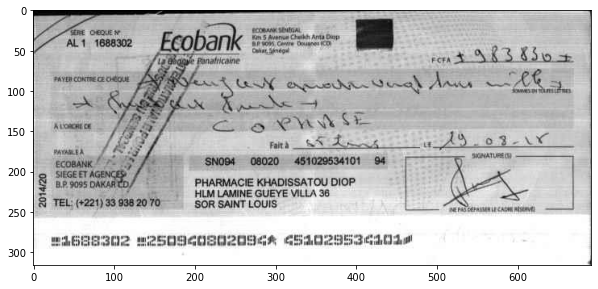

In [9]:

paw=os.path.join(path,liste[i])
s=seg_number(paw)
recognition(s)
#figure(num=None, figsize=(15, 15), dpi=100, facecolor='w', edgecolor='k')
#plt.axis("off")
plt.imshow(cv2.imread(paw))
plt.show()
